# Graph 1. BFS 

**MIT - Introduction to Algorithms /
Lecture 13. Breadth First Search (BFS)**

#### Graph G = (V,E)
- V = set of vertices(arbitary labels)
- E = set of edges i.e. vertex pairs(v,w)
    - ordered pair -> directed edge of graph
    - unordered parit -> undirected
    
#### UNDIR
- V = {a,b,c,d}
- E = {{a,b}, {a,c}, {b,c}, {b,d}, {c,d}}

#### DIR
- V = {a,b,c}
- E = {(a,c), (b,c), (c,b), (b,a)}

#### 그래프 탐색이란? 그래프의 종류는?

Graph Search: explore a graph
- 시작점 s에서 원하는 정점으로의 경로를 찾는다
- 그래프 또는 s에서 도달할 수 있는 모든 정점과 간선을 방문한다

E = set of edges
- All the edges directed: e = (v,w) ordered paris : 방향이 있음
- All the edges undirected: e = (v,w) unordered parid : 방향이 없음



- undirected의 경우 각 간선의 끝점을 앎
- a에 근접한 edges를 알고싶다면 모든 간선의 배열을 다 돌아야 함 (선형시간)
- adjacent list 통한 더 나은 방법을 시도하자

#### BFS가 실제로 어떻게 활용되나?

- web crawling (how Google finds pages)
    - 구글 웹 상의 모든 페이지를 찾고 싶을 때 계속해서 새로운 링크를 따라가야 했던 문제
    - 동적으로 생성되는 페이지들로 인해 무한히 반복해서 링크가 연결되는 문제가 발생
    - 해결을 위해 BFS 사용 가능. 즉 현재 페이지에서 도달할 수 있는 모든 것을 탐색
- social networking (Facebook friend finder)
    - 두 다리 건넌 친구를 찾기 위한 searching, 레이어에서 단서를 찾기 위한 반복이 필요하니 BFS
- network broadcast routing
- garbage collection
    - 도달할 수 없는 데이터를 정리함
    - 즉 어떤 데이터 구조에 더이상 도달할 수 없게 되면, 그 데이터를 버리고 새로운 메모리를 다시 얻으니 BFS
- model checking (finite state machine)
- checking mathematical conjectures
    - 모든 입력값을 확인해야하니, 전형적인 BFS 케이스
    - 일반적인 추측의 유한한 경우를 테스트하고 반례를 발견함
- solving puzzles and games
    - 큐브를 최적으로 풀기 위해 BFS, 최단거리 경로를 구함
    - 큐브를 풀 때까지 한 레이어씩 만듦 -> 전체 레이어의 수가 diameter, Diameter of the graph(God's number)
    - 각 레이어의 가능한 경로는 기하급수적으로 증가하다가 - exp 언덕을 넘어 - 마지막엔 약간 줄어듦
    - 복잡도는 theta(n^2/log_2(n))

#### 그래프 표현

인접리스트: |V| 연결리스트의 배열 Adj
- 각 정점 u에 대해 Adj[u]가 u의 이웃들을 저장함
- 파이썬에서, Adj = list / set values의 딕셔너리이고, vertex는 해시 가능한 int, tuple 같은 것들
- 하나의 정점에 여러 개의 그래프가 있을 수 있는 것이 장점

묵시적으로 표현된 그래프
- Adj(u)는 함수임. zero space를 필요로 함

이를 객체지향적으로 표현 가능
- u.neighbors = Adj[u]
- 다시 말해 object for each vertex u에 대해서 u.neighbors = list of neighbors i.e. Adj[u]

- 나아가 edge도 객체로 만들 수 있음
- 이렇게 하여, 해싱 없이도 edge를 저장할 수 있음
- Adjacency list는 theta(V+E)의 공간을 차지함

#### BFS

BFS란 어떤 정점에서 시작해 갈 수 있는 모든 정점 edge를 찾음. 반복으로 모든 정점을 탐색함
- 다시 말해 s에서 레벨 별로 그래프를 탐색함
    - level 0 = {s}
    - level i = 최소 i개 간선의 경로로 도달할 수 있는 정점
    - 모든 outgoing edges를 이용해 level i-1에서 level i >0을 만듦
    - 이 때 이전 level의 vertex는 무시함

In [ ]:
#pseudo code in python

BFS (V, Adj, s):
    level = {s: 0}
    parent = {s: None}
    i = 1
    frontier = [s] #previous level, i-1
    while frontier:
        next = [] #next level, i
        for u in frontier:
            for v in Adj[u]:
                if v not in level: #not yet seen
                    level[v] = i #level[u] + 1
                    parent[v] = u
                    next.append(v)
        frontier = next
        i += 1

시간복잡도는 O(E)
- 방향그래프의 경우 |E|
- 무방향그래프의 경우 2|E|

v에서 도달할 수 없는 vertex(level이 지정되지 않은) 리스트에서 O(V+E)

#### Shortest Path

- 각 vertex에 대해 s에서 v로 가는 최단거리는
    - level[v] if v assigned level
    - infinite (no path)
    
- parent pointer는 최단경로 트리를 형성함. 즉 각 v에 대한 최단경로의 조합을 알 수 있음
    - 최단경로를 찾기 위해서는 v를 찾고, parent[v]를 찾고, parent[parent[v]]를 찾아 s에 도달하거나 끝날 때까지 찾으면 됨

# Graph 2. DFS 

**MIT - Introduction to Algorithms /
Lecture 14. Depth First Search (DFS)**

- BFS는 레이어를 하나씩 탐색하며 시작점 s로부터 끝점까지의 최단 경로를 알 수 있었음
- 그러나 끝점에 도달할 수 없다면 최단 경로는 무한임
- 이와 비교하여 DFS는 s가 도달할 수 있는 경로만 탐색하는 것이 아닌, 그래프 전체를 탐색함
- 즉 DFS가 BFS보다 일반적인 방법임

In [ ]:
#pseudo code in python

#explore entire graph (could do same to exten BFS), 외부 루프 O(V+E)
parent = {s: None}

#search from start vertex s (only see stuff reachable from s), O(E)
DFS-visit (V, Adj, s):
    for v in Adj[s]: #start vertex
        if v not in parent:
            parent[v] = s
            DFS-visit (V, Adj, v) 
            
DFS(V, Adj)
    parent = {}
    for s in V: #finish vertex
        if s not in parent:
            parrent[s] = None
            DFS-visit(V, Adj, s)

- 막다른 골목까지 경로를 따라감
- DFS는 미로찾기와 같은 recursively explore
- 방문한 것을 parent dict를 통해 확인함 (빵 부스러기)
- vertex를 반복하지 않는 것에 유의

#### 시간복잡도 계산

- 재귀에서는 O(E)
- 외부 루프까지 포함하면 O(V+E), 즉 BFS와 같이 linear time (모든 정점을 한 번씩 방문하니)

    - a->b (parent node : a)
    - b->e (parent node : a)
    - e->d (parent node : e)
    - d->b 갈 수 없음 b는 이미 방문했으니 skip - 다음 단계 위로 올라감 : 현재 위치 e
    - backtrack e
    - backtrack b
    - backtrack a(이미 d는 방문했으니 재귀를 끝냄)
    - b로 이동(e 가봤으니 다음으로)
    - c로 이동 s2 설정
    - c->f (parent node : c)
    - f loop 이미 방문했으니 되돌아감

#### Edge Classification

DFS의 과정에서 그래프의 모든 edge를 최소 한 번 만나게 됨. 처음 vertex와 연결되는 edge를 모아서 보면 tree 형태. 이 tree가 모든 vertex를 지나치므로, spanning tree가 됨
- spanning tree: 최상의 vertex를 root node로 하고, 모든 그룹 멤버들을 자손으로 갖는 트리 구조

- forward edge: node -> descendant in tree
- backward edge: node -> ancestor in tree
- cross edge: between two non-ancestor-related subtrees

Edges는 크게 2가지로 분류 가능, NoneTree와 Tree
- NoneTree Edges: forward edge, backward, edge, cross edge
- Tree Edges: NoneTree Edges 제외한 나머지

- 간선 분류를 계산하기 위해 (forward or backward) vertex를 스택에 들어있는 동안 표시함
- 무방향 그래프에서는 tree edges(formed by parent)와 back edge(to ancestor)만 존재

이 분류는 후에 알고리즘의 서술에 중요하게 사용됨

#### Edge Classification 응용 1. Cycle Detection

back edge의 존재와 동치. 사이클을 만드는 edge를 가지고 vertex에 도달할 때, 그 간선은 반드시 back edge임을 알 수 있음
- 그래프 G가 순환임 = DFS가 back edge를 지님
- v0가 시작이라면, (vk, v0)를 back edge라 할 수 있으니


#### Edge Classification 응용 2. Topological Sort

위상 정렬의 배열 역순으로 간선이 존재하면 위상정렬은 유효x. 각 edge의 분류 별로 배열 역순을 살피면, 간선의 정의 또는 가정과 모순되어 DFS를 통한 위상 정렬의 유효함을 증명 가능

- DFS finishing times(DFS-visit(v)가 끝나는 시간)의 역
- Topological Sort에서는 cycle이 없는 acylic 상태를 가정하여, back edge를 고려할 필요x

-> 아래는 [추가자료_그래프간선의 분류](https://bowbowbow.tistory.com/1)를 참조하여 적음. 이미지 또한 해당 자료가 출처임.

vertex A, B 사이의 edge (A,B)에 대해 아래의 조건을 이용하면
 - 발견된 순서를 기록하는 배열(int discovered[MAXV]
 - 각 정점에서의 DFS함수 종류의 상태를 기록하는 배열 (bool finished[MAXV])
 
 이 둘을 도입하여 DFS 탐색을 진행하면서 모든 edge를 분류할 수 있음

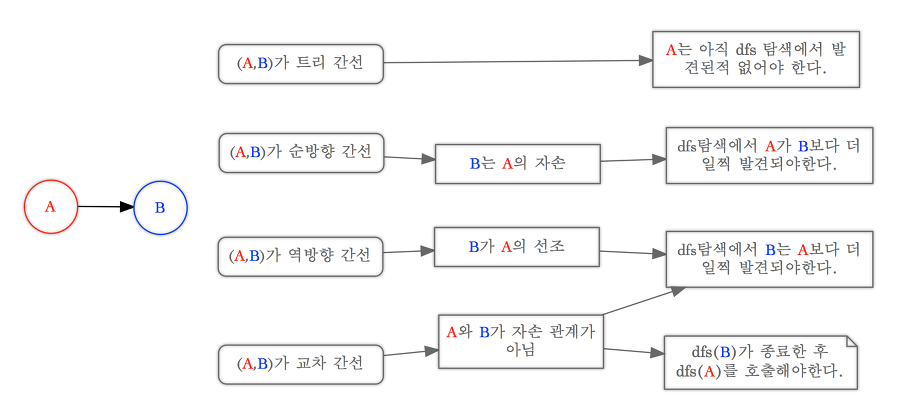